Episodes before solve 53


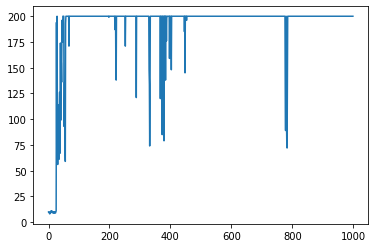

In [15]:
import autograd.numpy as np
import gym
import matplotlib.pyplot as plt
from autograd import grad, elementwise_grad
import random
from IPython import display

def approx(weights, state, action):
    return np.dot(state, weights)[action]

def policy(env, weights, state, epsilon):
    actions = [0, 1]
    if np.random.rand() < epsilon:
        return random.choice(actions)
    qs = []
    for action in actions:
        qs.append(approx(weights, state, action))
    return np.argmax(qs)

gradientApprox = grad(approx)
episodes = 1000
discount = 0.95
epsilon = 0.1
alpha = 0.1

env = gym.make('CartPole-v0')
epRewards = []
w = np.zeros((4,2))
for e in range(episodes):
    state = env.reset()
    rewards = []
    while True:
        action = policy(env, w, state, epsilon)
        q_hat = approx(w, state, action)
        q_hat_grad = gradientApprox(w, state, action)
        next_state, reward, done, _ = env.step(action)
        rewards.append(reward)
        if done:
            w += alpha*(reward - q_hat) * q_hat_grad
            break
        else:
            next_action = policy(env, w, next_state, epsilon)
            q_hat_next = approx(w, next_state, next_action)
            w += alpha*(reward - discount*q_hat_next)*q_hat_grad
            state = next_state
    epRewards.append(np.sum(rewards))
    
for i, _ in enumerate(epRewards):
    if i + 100 >= len(epRewards):
        break
    else:
        mean = np.mean(epRewards[i:i+100])
        if mean >= 195:
            print("Episodes before solve", i+1)
            break

plt.plot(epRewards)